# Zuber

I will further the analysis for the rideshare Zuber by loading the datasets and plotting charts to visualize the data better. I check for missing or duplicate values and make sure the data is usable for further analysis. I finally finish off with testing the hypothesis that rainy days cause a diffrence in travel time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

name_amt = pd.read_csv('/datasets/moved_project_sql_result_01.csv')
loc_avg = pd.read_csv('/datasets/moved_project_sql_result_04.csv')

Imported  the files and read them.

In [2]:
name_amt

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [3]:
loc_avg

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


seelig the organization and layout of the data.

In [4]:
name_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
loc_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
name_amt.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
loc_avg.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [8]:
name_amt.duplicated().sum()

0

In [9]:
loc_avg.duplicated().sum()

0

In [10]:
print(name_amt['company_name'].unique())
print(loc_avg['dropoff_location_name'].unique())

['Flash Cab' 'Taxi Affiliation Services' 'Medallion Leasin' 'Yellow Cab'
 'Taxi Affiliation Service Yellow' 'Chicago Carriage Cab Corp'
 'City Service' 'Sun Taxi' 'Star North Management LLC'
 'Blue Ribbon Taxi Association Inc.' 'Choice Taxi Association'
 'Globe Taxi' 'Dispatch Taxi Affiliation' 'Nova Taxi Affiliation Llc'
 'Patriot Taxi Dba Peace Taxi Associat' 'Checker Taxi Affiliation'
 'Blue Diamond' 'Chicago Medallion Management' '24 Seven Taxi'
 'Chicago Medallion Leasing INC' 'Checker Taxi' 'American United'
 'Chicago Independents' 'KOAM Taxi Association' 'Chicago Taxicab'
 'Top Cab Affiliation' 'Gold Coast Taxi' 'Service Taxi Association'
 '5 Star Taxi' '303 Taxi' 'Setare Inc' 'American United Taxi Affiliation'
 'Leonard Cab Co' 'Metro Jet Taxi A' 'Norshore Cab'
 '6742 - 83735 Tasha ride inc' '3591 - 63480 Chuks Cab'
 '1469 - 64126 Omar Jada' '6743 - 78771 Luhak Corp'
 '0118 - 42111 Godfrey S.Awir' '6574 - Babylon Express Inc.'
 'Chicago Star Taxicab' '1085 - 72312 N and W Cab C

Printed the general/summary information about the DataFrames. Checked for missing values and duplicates.
Looking at the samples and datatypes and it all looks good for further reading.

Identifed the top 10 neighborhoods in terms of drop-offs.

In [11]:
top = loc_avg.sort_values(by='average_trips', ascending=False).head(10)
top

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


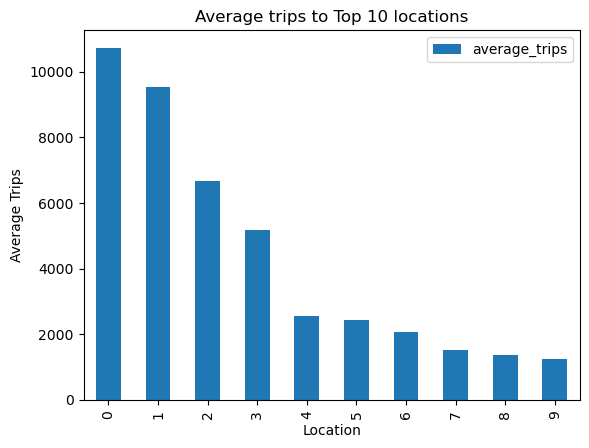

In [12]:
top.plot(kind='bar',
                  xlabel= 'Location', 
                  ylabel= 'Average Trips',
                  title= 'Average trips to Top 10 locations')
plt.show()

Bar graph showing the average drop offs to the top 10 locations. The top 4 locations have a much greater amount compared to the rest.

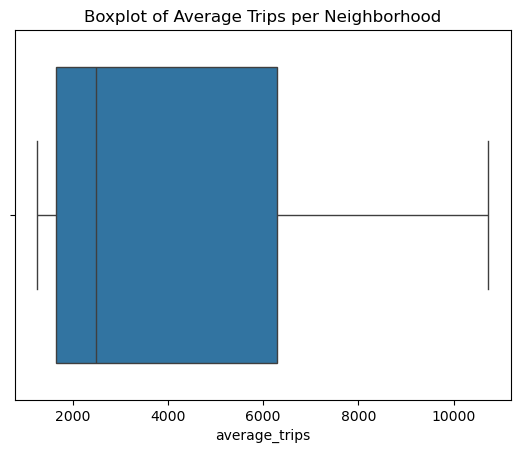

In [13]:
sns.boxplot(data=top, x='average_trips')
plt.title('Boxplot of Average Trips per Neighborhood')
plt.show()

Boxplot of the average trips, showing the median average of the top ten locations having about 2500 trips.

<Axes: ylabel='Frequency'>

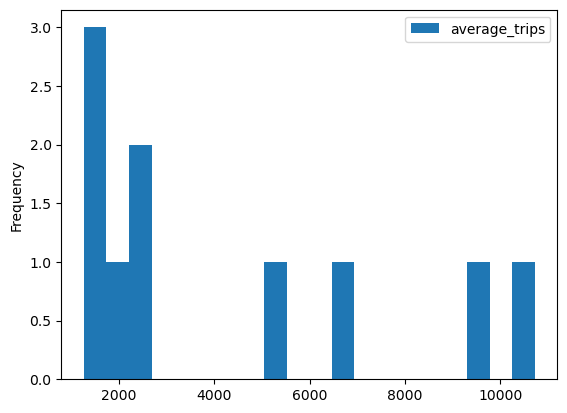

In [14]:
top.plot(kind= 'hist', bins=20)

Histogram of the average trips. it looks like locations are grouped together, with it skewed to the left.

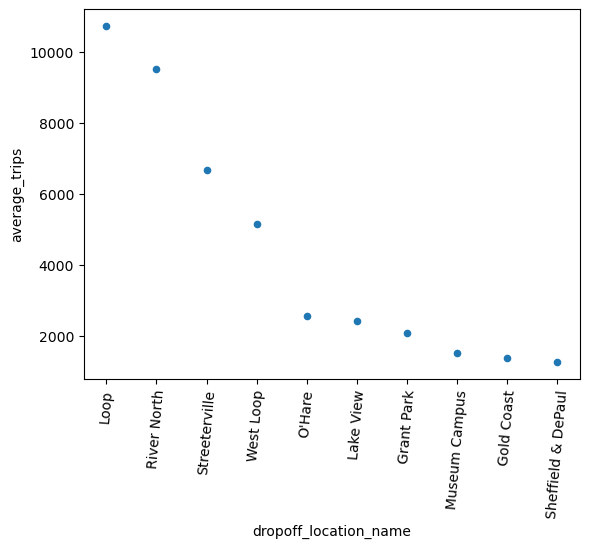

In [15]:
top.plot(kind='scatter', x= 'dropoff_location_name', y= 'average_trips', )
plt.xticks(rotation=85)
plt.show()

Scatterplot similar to the bar plot. it shows the locations and their average drop offs. The top 4 are:
- Loop
- River North
- Streeterville
- West Loop.

# Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Decideed on the significance level with alpha = .05.

Loaded weather dataset and enriched the data and used ligical indexing to get the portions thats needed to test the hypothesis.

In [16]:
weather = pd.read_csv('/datasets/moved_project_sql_result_07.csv')

In [17]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
weather['start_ts']=pd.to_datetime(weather['start_ts'])

In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [20]:
weather

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [21]:
rain = weather[(weather['weather_conditions']== 'Bad') &(weather['start_ts'].dt.dayofweek == 5)]
non_rain = weather[(weather['weather_conditions']== 'Good') & (weather['start_ts'].dt.dayofweek == 5)]


In [23]:
average_duration = rain['duration_seconds'].mean()
average_duration

2427.2055555555557

In [25]:
average_duration_non = non_rain['duration_seconds'].mean()
average_duration_non

1999.6756756756756

Calculating the averages of the trip duration. it seems as though rain causes the tip duration to increase.

In [27]:
alpha=.05
results= st.ttest_ind(rain['duration_seconds'],non_rain['duration_seconds'])
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.517970327099473e-12
We reject the null hypothesis


Above I tested the null hypothesis that the trip duration of rainy and non rainy days are the same. Since we reject the null it is clear that there are diffrences in rainy day trip duration. I close an alpha value of .05 and filtered teh data do only include Saturdays where the weather was good or bad.